# Churn Predictor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('Churn.xls')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   VMail Message   3333 non-null   int64  
 2   Day Mins        3333 non-null   float64
 3   Eve Mins        3333 non-null   float64
 4   Night Mins      3333 non-null   float64
 5   Intl Mins       3333 non-null   float64
 6   CustServ Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Int'l Plan      3333 non-null   int64  
 9   VMail Plan      3333 non-null   int64  
 10  Day Calls       3333 non-null   int64  
 11  Day Charge      3333 non-null   float64
 12  Eve Calls       3333 non-null   int64  
 13  Eve Charge      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Calls      3333 non-null   int64  
 17  Intl Charge     3333 non-null   f

In [5]:
df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [7]:
df.shape

(3333, 21)

#### We are looking for high correlations in order to eliminate them

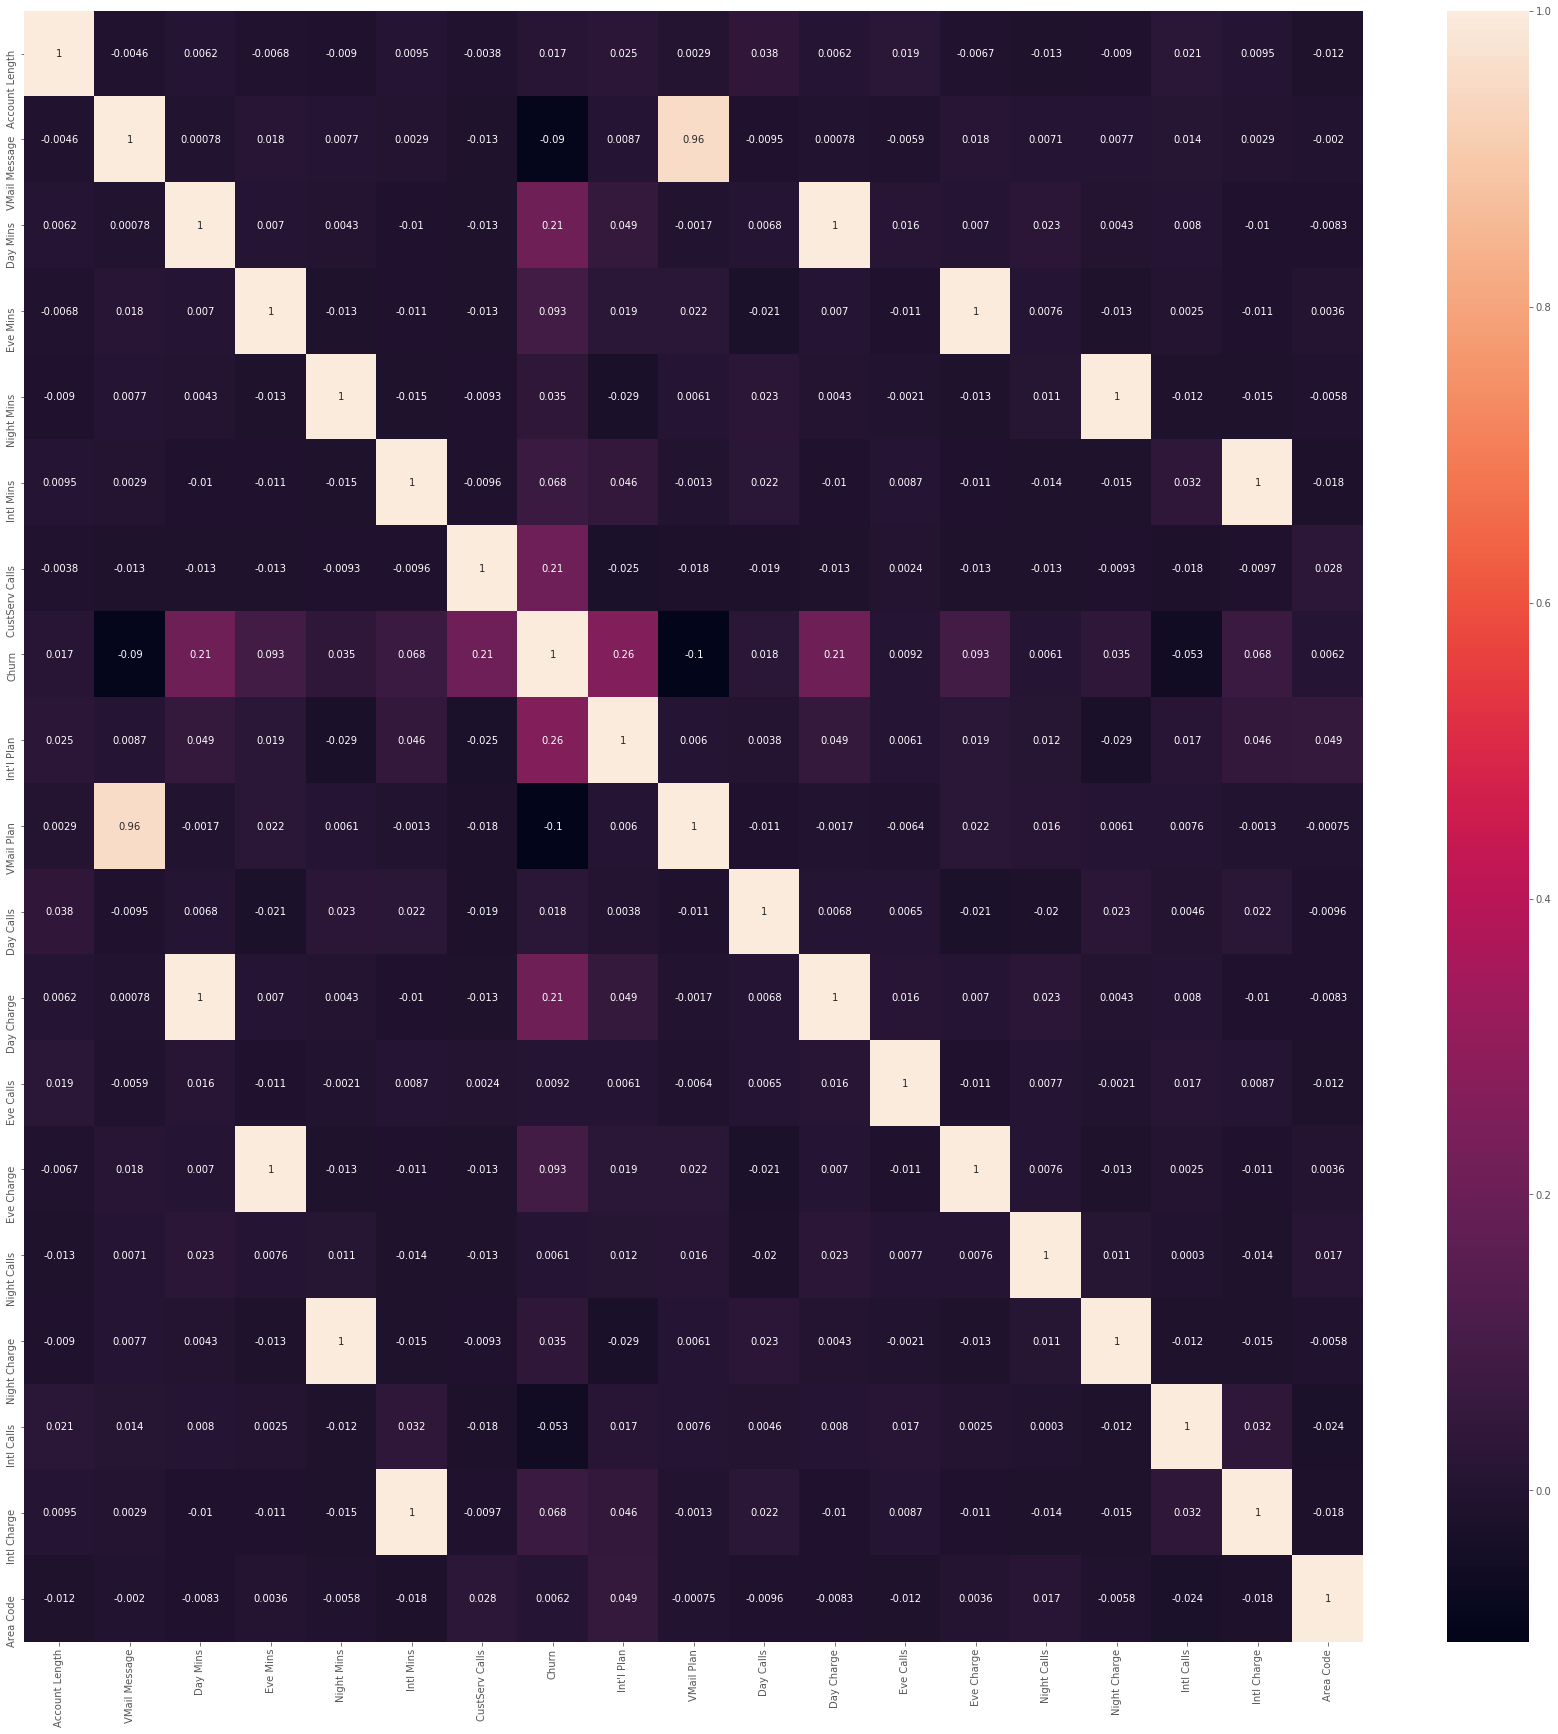

In [8]:
plt.subplots(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
df1 = df.drop(['Intl Mins','Night Mins','VMail Message','Eve Mins','Day Mins','VMail Plan'], axis = 1)

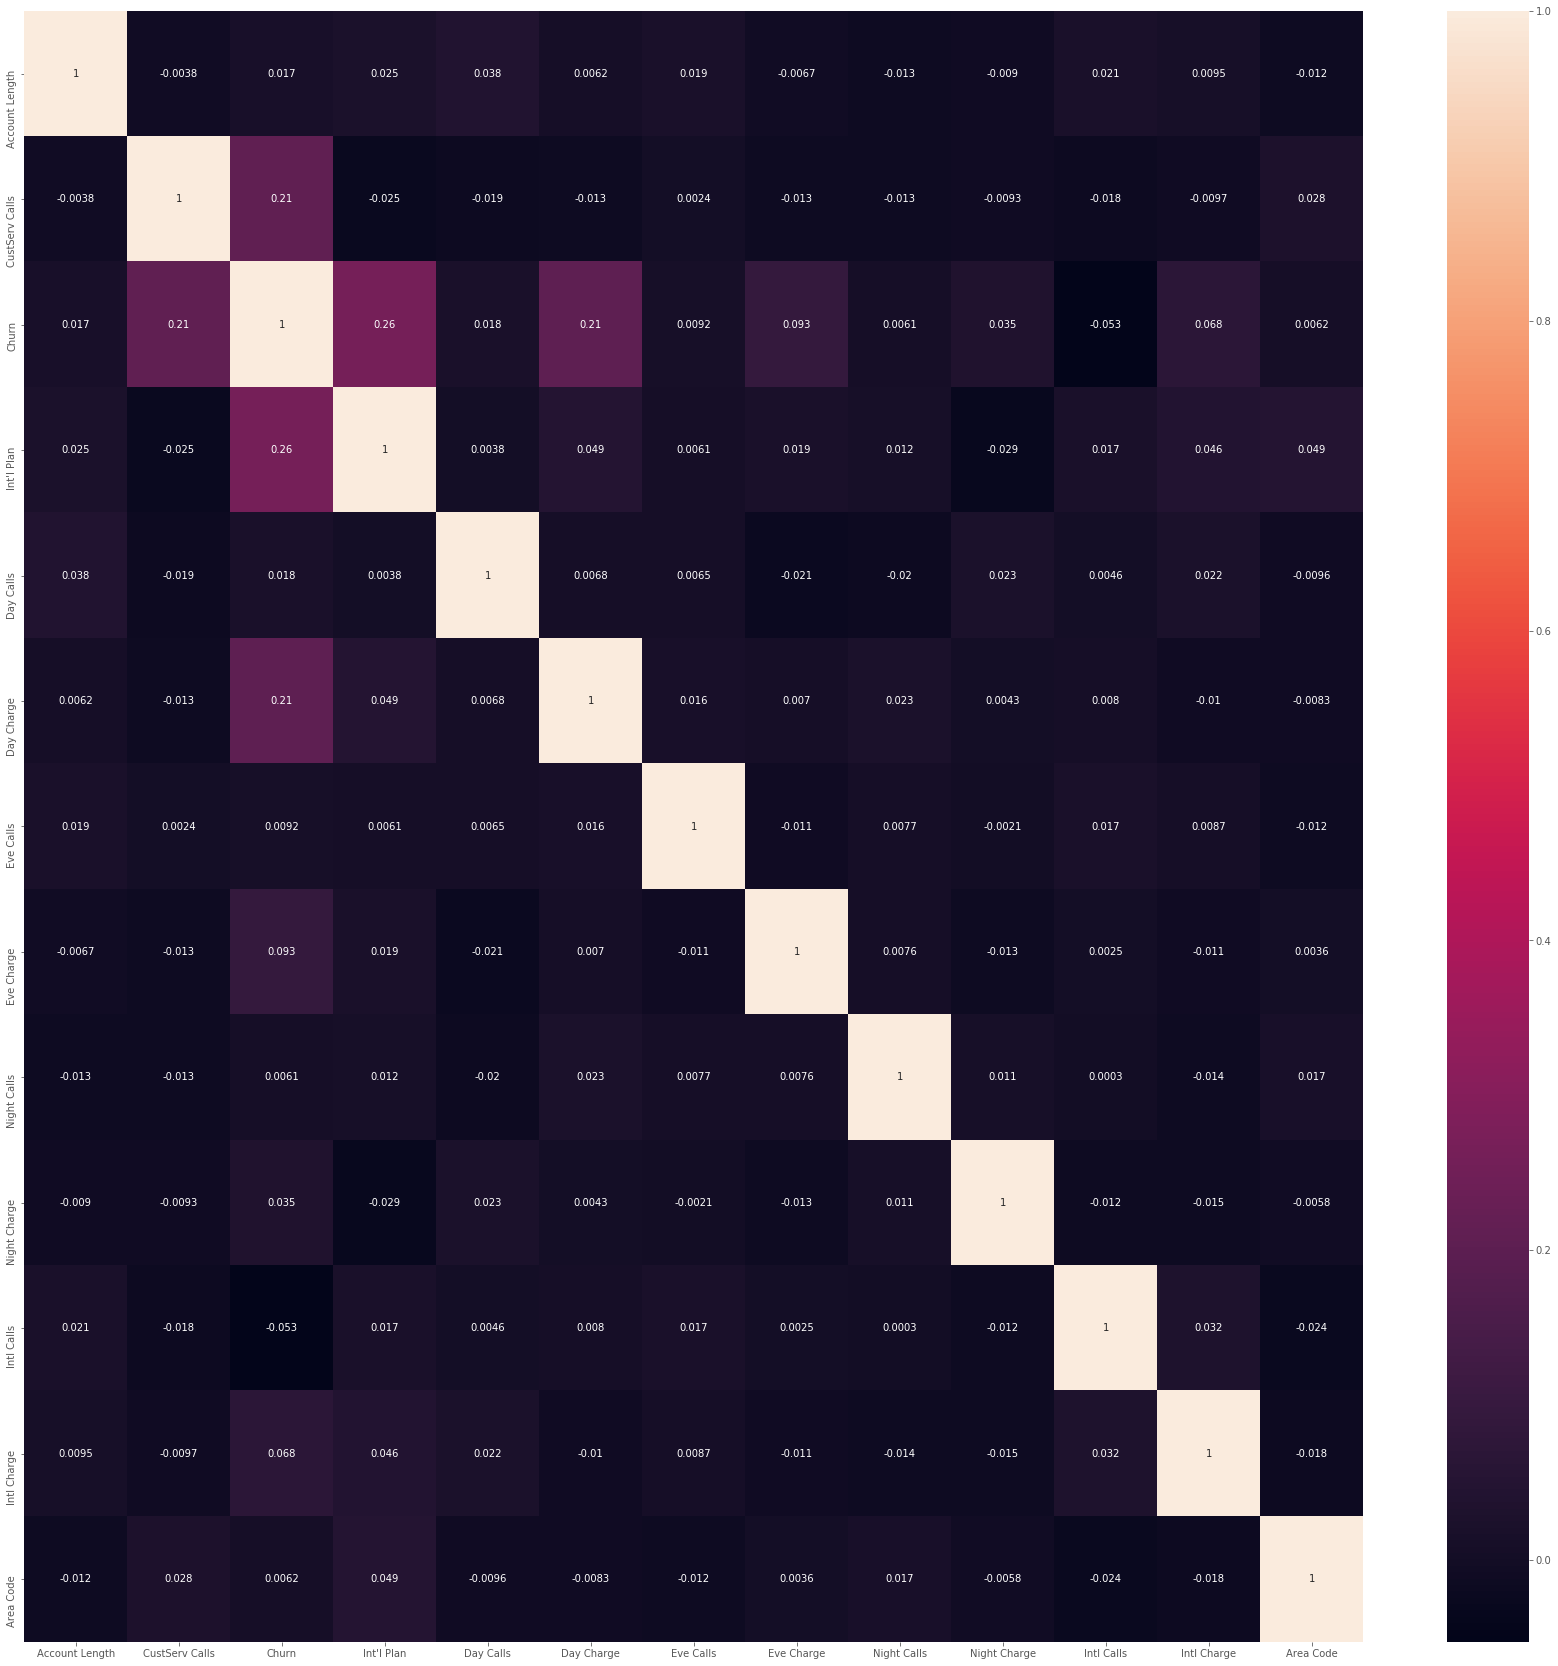

In [10]:
plt.style.use('ggplot')
plt.subplots(figsize = (30,30))
sns.heatmap(df1.corr(), annot = True)
plt.show()

#### Pre-processing for the model

In [11]:
encoder = LabelEncoder()
clase = encoder.fit_transform(df1.State.values)
state=  pd.Series(clase)
df1.State = state

In [12]:
Y = df1.Churn
X = df1.drop(['Churn', 'Phone'] , axis = 1)

In [13]:
X_train, X_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 33)

### Testing different models

In [14]:
#------------------Logistic Regression---------------------
log_reg = LogisticRegression(max_iter= 1500)
log_reg.fit(X_train,Y_train)
pred = log_reg.predict(X_test)
acc_log = log_reg.score(X_train, Y_train)
#------------------------KNN-------------------------
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)
#--------------NAIVE BAYES--------------
gauss_nav = GaussianNB()
gauss_nav.fit(X_train, Y_train)
gauss_nav.predict(X_train)
acc_gn = gauss_nav.score(X_train, Y_train)
#---------------------PERCEPTRON-----------------
pct = Perceptron()
pct.fit(X_train, Y_train)
pct.predict(X_test)
acc_pect = pct.score(X_train, Y_train)
#---------------------DECISSION TREE------------------
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree.predict(X_test)
acc_dtree = dtree.score(X_train, Y_train)
#---------------------RANDOM FOREST---------------------------
rand_for = RandomForestClassifier()
rand_for.fit(X_train, Y_train)
rand_for.predict(X_test)
acc_rand_for = rand_for.score(X_train, Y_train)
#------------------EVALUACION-----------------------------
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_rand_for, acc_gn, acc_pect, 
              acc_dtree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,1.000000
5,Decision Tree,1.000000
0,KNN,0.866842
1,Logistic Regression,0.862341
4,Perceptron,0.852213
3,Naive Bayes,0.845086


### Random Forest

In [15]:
%%time
RF = RandomForestClassifier(n_estimators=250,criterion='entropy', max_depth= 20, n_jobs = -1)
RF.fit(X_train, Y_train)
y_pred = RF.predict(X_test)

Wall time: 816 ms


#### Evaluation Metrics

In [35]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
y_prob = RF.predict_proba(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('F1 score: ', metrics.f1_score(y_test, y_pred))
print('ROC AUC score: ', metrics.roc_auc_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('RECALL: ', metrics.recall_score(y_test, y_pred))
print('Specificity: ',specificity)
print('Log-loss: ', metrics.log_loss(y_test,y_prob))

Confusion Matrix
[[569  13]
 [ 34  51]]
Accuracy:  0.9295352323838081
F1 score:  0.6845637583892616
ROC AUC score:  0.7888316151202749
Precision:  0.796875
RECALL:  0.6
Specificity:  0.9776632302405498
Log-loss:  0.23282998032700605


#### Features Importance

In [17]:
feature_importance = pd.DataFrame([df1.drop(['Churn','Phone'], axis = 1).columns,\
                                           RF.feature_importances_ ], \
            index = ['Feature', 'Importances']).T.sort_values('Importances', ascending = False)
feature_importance

,Feature,Importances
4,Day Charge,0.233613
1,CustServ Calls,0.11982
6,Eve Charge,0.101187
2,Int'l Plan,0.0794584
10,Intl Charge,0.0723398
8,Night Charge,0.0664057
9,Intl Calls,0.0581549
3,Day Calls,0.0543243
0,Account Length,0.0536331
7,Night Calls,0.0514388


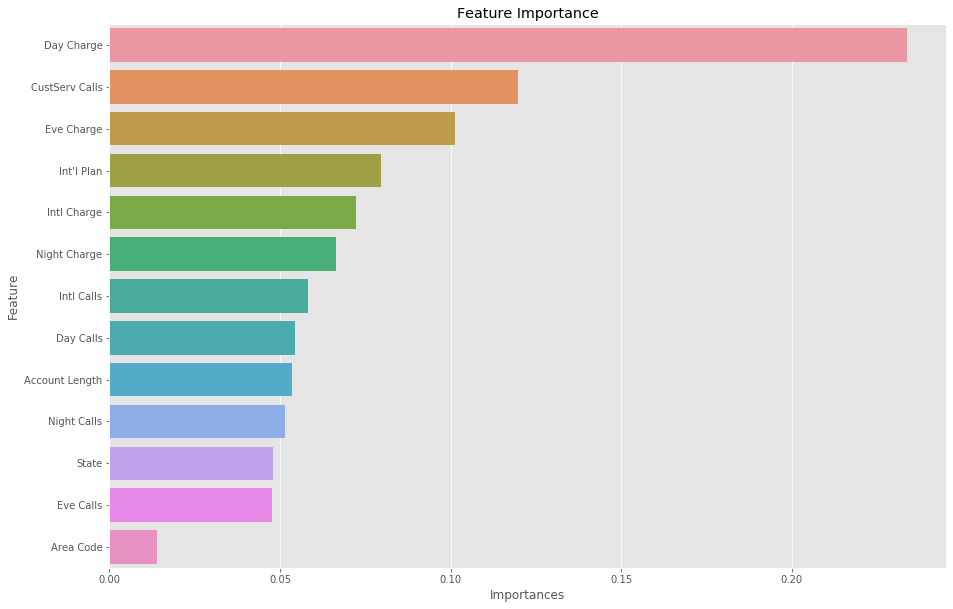

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(y = feature_importance.Feature, x= feature_importance.Importances)
plt.title('Feature Importance')
plt.show()

#### Cumulative Gains Curve and Lift Curve

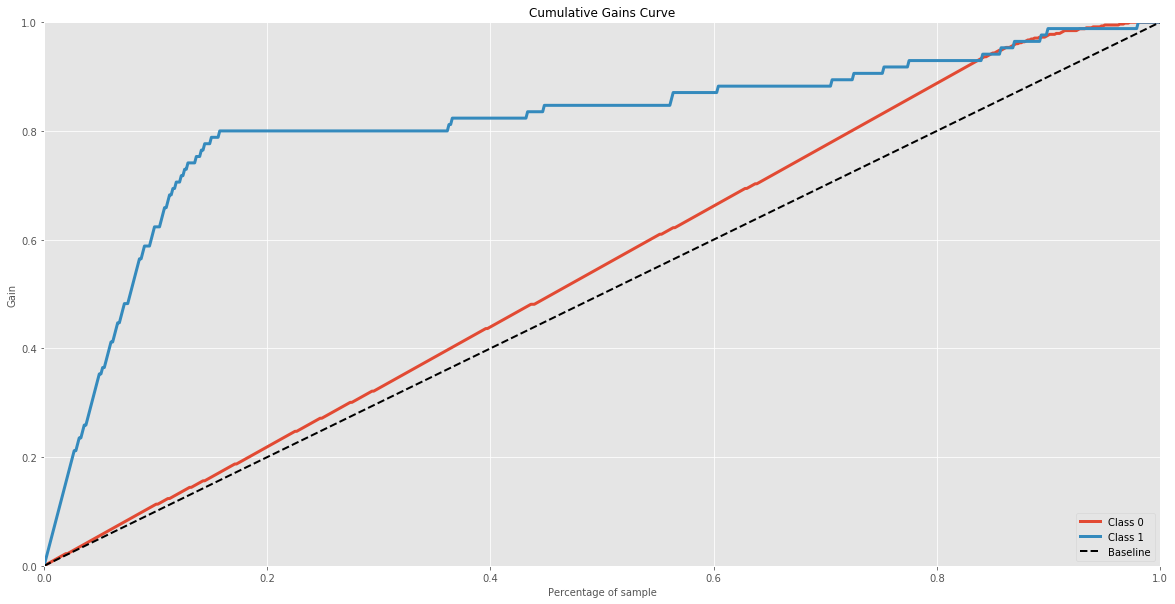

In [19]:
plt.style.use('ggplot')
y_probas = RF.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(20,10))
plt.show()

#### if we observe 20% of the observations, the model will ensure that 80% of the clients with danger of flight of the total reside in this group

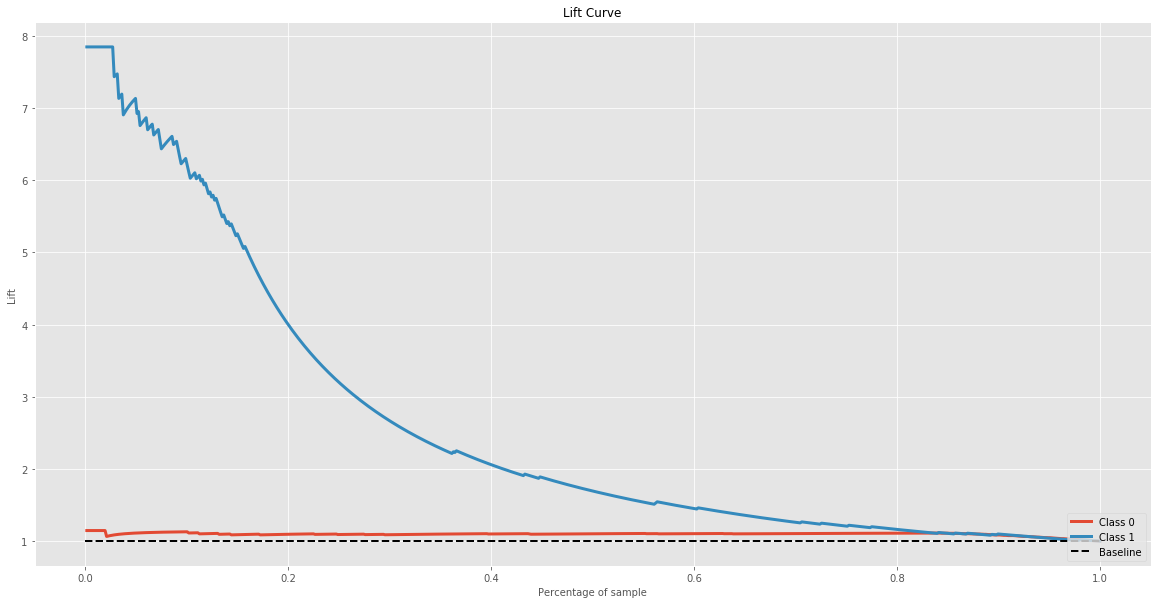

In [20]:
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(20,10))
plt.show()

#### If the average incidence of the objectives is 20%, the model allows four times more objectives to be addressed for this group, compared to not using any model, which is random

#### Optimization (Grid Search)

In [21]:
RF1 = RandomForestClassifier(n_estimators=250,criterion='entropy', max_depth= 20, n_jobs = -1)

In [23]:
params={'criterion':['gini', "entropy"],
        'max_depth': [10,15,20],
        'max_features': [1,2,3,4,12], 
        'max_leaf_nodes': [10,15,20], 
        'min_impurity_decrease' : np.linspace(0,0.01, 7).tolist(), 
        'min_samples_split': [3] 
        }


#### We look for the best parameters to optimize the recall, we are interested in improving this metric, it indicates how well we are classifying clients who are really in danger of flight well.

In [24]:
%%time
grid_solver = GridSearchCV(estimator = RF1, 
                   param_grid = params,
                   scoring = ['accuracy',"recall"],
                   cv = 10,
                   refit = 'recall',
                   n_jobs=3)
model_result = grid_solver.fit(X, Y)

Wall time: 43min 22s


### Evaluation Grid Search

In [25]:
print('RF RECALL: ', metrics.recall_score(y_test, y_pred))
print('GridSearch RECALL: ',model_result.best_score_)
print('Difference between models (RECALL): ',model_result.best_score_ - metrics.recall_score(y_test, y_pred))

RF RECALL:  0.6
GridSearch RECALL:  0.6977040816326531
Difference between models (RECALL):  0.0977040816326531


In [26]:
%%time
recall_score = []
for i in range(100):
    best_model = model_result.best_estimator_.fit(X_train,Y_train)
    y_hat = best_model.predict(X_test)
    recall_score.append(metrics.recall_score(y_test,y_hat))
print("Recall: ", np.mean(recall_score))

Recall:  0.6750588235294118
Wall time: 1min 55s


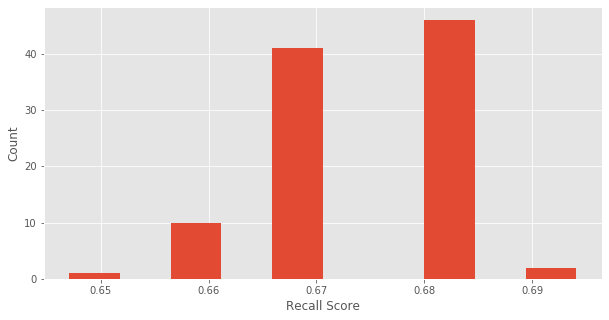

In [27]:
plt.figure(figsize=(10,5))
pd.Series(recall_score).hist(bins = 10)
plt.xlabel('Recall Score')
plt.ylabel('Count')
plt.show()

In [36]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()
specificity = tn / (tn+fp)
y_probs = best_model.predict_proba(X_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, y_hat))
print('Accuracy: ', metrics.accuracy_score(y_test, y_hat))
print('F1 score: ', metrics.f1_score(y_test, y_hat))
print('ROC AUC score: ', metrics.roc_auc_score(y_test, y_hat))
print('Precision: ', metrics.precision_score(y_test, y_hat))
print('RECALL: ', metrics.recall_score(y_test, y_hat))
print('Specificity: ',specificity)
print('Log-loss: ', metrics.log_loss(y_test,y_probs))

Confusion Matrix
[[567  15]
 [ 28  57]]
Accuracy:  0.9355322338830585
F1 score:  0.7261146496815285
ROC AUC score:  0.8224075197089143
Precision:  0.7916666666666666
RECALL:  0.6705882352941176
Specificity:  0.9742268041237113
Log-loss:  0.19969002192913543


In [29]:
FS = pd.DataFrame([df1.drop(['Churn', 'Phone'], axis = 1).columns,best_model.feature_importances_],\
                index = ['Features', 'Importances']).T.sort_values('Importances', ascending = False)

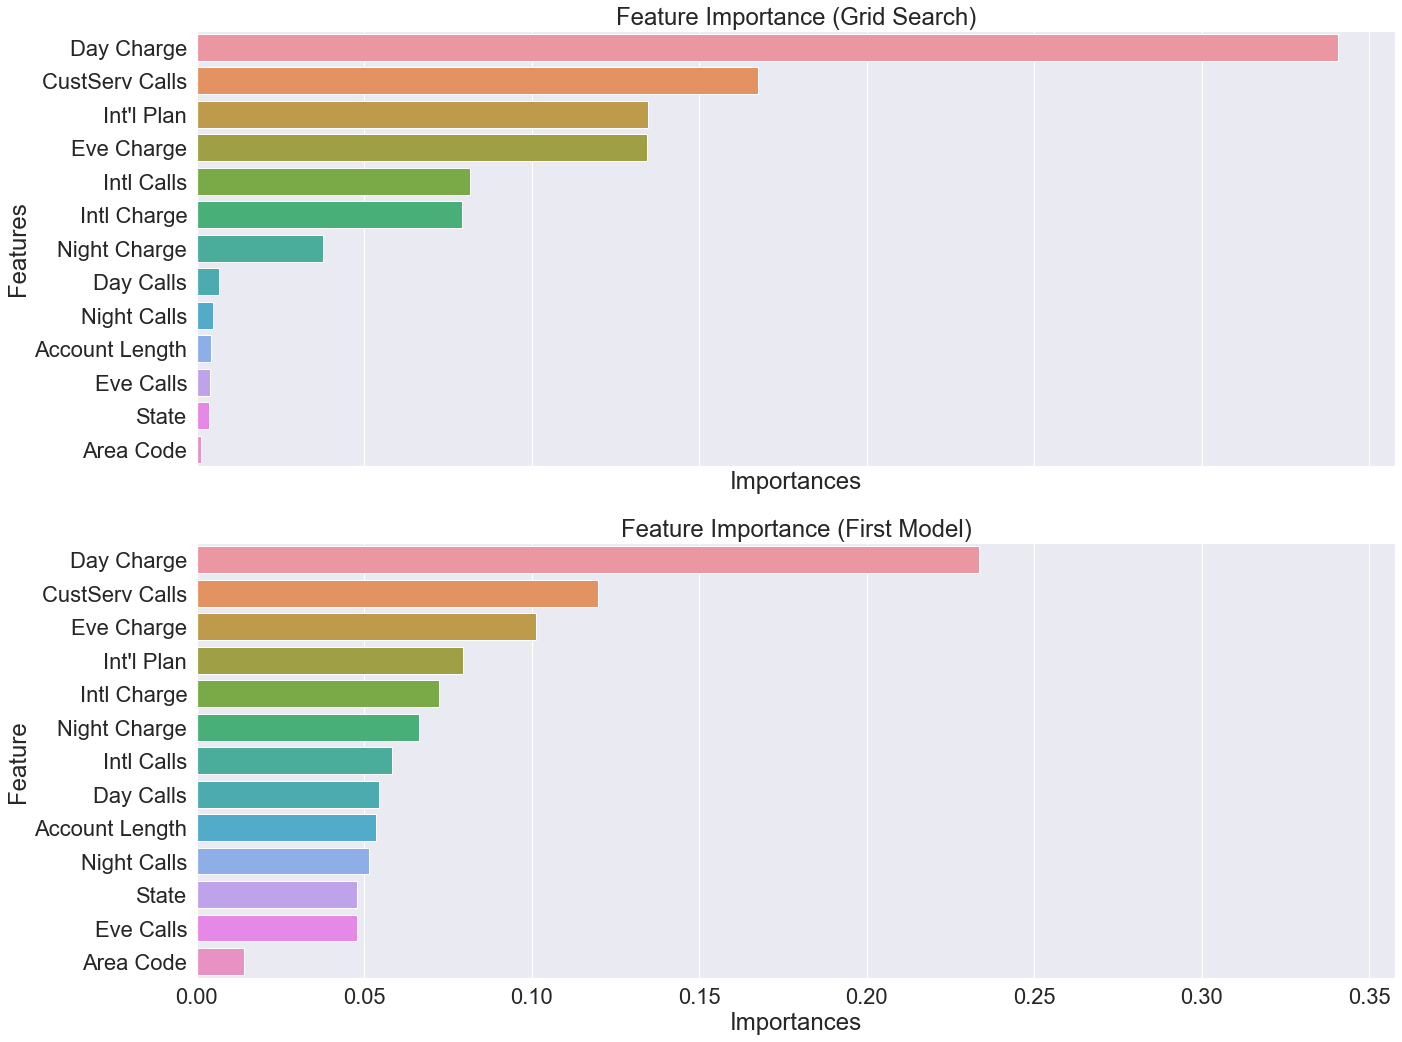

In [33]:
fig, ax = plt.subplots(2,1,figsize=(20, 15), sharex = True)
sns.set(font_scale=2)
ax[0].set_title('Feature Importance (Grid Search)')
ax[1].set_title('Feature Importance (First Model)')
sns.barplot(y = FS.Features, x=  FS.Importances, ax = ax[0])
sns.barplot(y = feature_importance.Feature, x= feature_importance.Importances, ax = ax[1])
# ax.set_xlabel(fontsize=30)
# ax.set_ylabel(fontsize=20)
plt.tight_layout()
plt.show()

### Conclusions:

##### We can predict approximately 67% of clients at risk of leakage, metrics such as Log-loss and ROC AUC score confirm that the model has good predictive power, being 20% and 82% respectively, in addition to the model's accuracy it is 93%.